In [2]:
import pandas as pd
import matplotlib as plt

url = "https://raw.githubusercontent.com/roderickwlucas/TaxTechnology/master/Lectures/Big%20Data/Data/tax_fraud.csv"
df = pd.read_csv(url, sep=';')
df.head()

,id,name,sex,age,social_class,siblings,parents_alive,annual_income,housenumber,browser_used,city,fraud
0,1,"Allen, Miss. Elisabeth Walton",female,29.0000,1,0,0,2113375.0,228,Chrome,"St Louis, MO",No
1,2,"Allison, Master. Hudson Trevor",male,0.9167,1,1,2,1515500.0,25,Chrome,"Montreal, PQ / Chesterville, ON",No
2,3,"Allison, Miss. Helen Loraine",female,2.0000,1,1,2,1515500.0,102,Chrome,"Montreal, PQ / Chesterville, ON",Yes
3,4,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,1,2,1515500.0,112,Chrome,"Montreal, PQ / Chesterville, ON",Yes
4,5,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,1,2,1515500.0,232,Chrome,"Montreal, PQ / Chesterville, ON",Yes


# Data analysis

In [0]:
n_obs = df.shape[0]

In [4]:
df.groupby(['fraud'])['id'].count()

fraud
No     500
Yes    809
Name: id, dtype: int64

In [5]:
df.groupby(['sex'])['id'].count()

sex
female    466
male      843
Name: id, dtype: int64

In [6]:
df.groupby(['sex', 'fraud'])['id'].count()

sex     fraud
female  No       339
        Yes      127
male    No       161
        Yes      682
Name: id, dtype: int64

In [7]:
df.groupby(['siblings', 'fraud'])['id'].count()

siblings  fraud
0         No       309
          Yes      582
1         No       163
          Yes      156
2         No        19
          Yes       23
3         No         6
          Yes       14
4         No         3
          Yes       19
5         Yes        6
8         Yes        9
Name: id, dtype: int64

# Missing Values

In [8]:
df.isnull().any()

id               False
name             False
sex              False
age               True
social_class     False
siblings         False
parents_alive    False
annual_income     True
housenumber      False
browser_used     False
city              True
fraud            False
dtype: bool

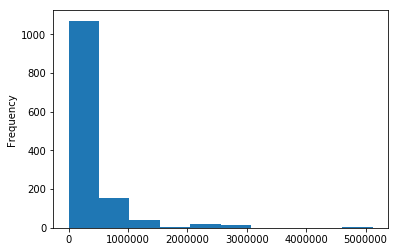

In [9]:
df['annual_income'].plot(kind='hist')

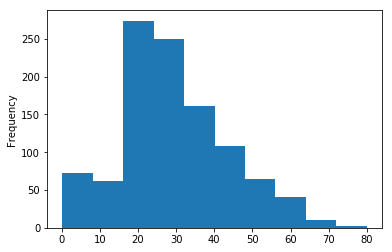

In [10]:
df['age'].plot(kind='hist')

In [0]:
age_impute = df['age'].mean()
income_impute = df['annual_income'].median()
city_impute = 'Chrome'

In [0]:
df["age"].fillna(age_impute, inplace=True)
df["annual_income"].fillna(income_impute, inplace=True)
df["city"].fillna(city_impute, inplace=True)

In [13]:
df.isnull().any()

id               False
name             False
sex              False
age              False
social_class     False
siblings         False
parents_alive    False
annual_income    False
housenumber      False
browser_used     False
city             False
fraud            False
dtype: bool

# Feature engineering

In [14]:
import re

df['family_size'] = df['siblings'] + df['parents_alive']
df['title'] = df['name'].apply(lambda x: re.search(' ([A-Z][a-z]+)\.', x).group(1))

df.head()

,id,name,sex,age,social_class,siblings,parents_alive,annual_income,housenumber,browser_used,city,fraud,family_size,title
0,1,"Allen, Miss. Elisabeth Walton",female,29.0000,1,0,0,2113375.0,228,Chrome,"St Louis, MO",No,0,Miss
1,2,"Allison, Master. Hudson Trevor",male,0.9167,1,1,2,1515500.0,25,Chrome,"Montreal, PQ / Chesterville, ON",No,3,Master
2,3,"Allison, Miss. Helen Loraine",female,2.0000,1,1,2,1515500.0,102,Chrome,"Montreal, PQ / Chesterville, ON",Yes,3,Miss
3,4,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,1,2,1515500.0,112,Chrome,"Montreal, PQ / Chesterville, ON",Yes,3,Mr
4,5,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,1,2,1515500.0,232,Chrome,"Montreal, PQ / Chesterville, ON",Yes,3,Mrs


In [15]:
df.columns

Index(['id', 'name', 'sex', 'age', 'social_class', 'siblings', 'parents_alive',
       'annual_income', 'housenumber', 'browser_used', 'city', 'fraud',
       'family_size', 'title'],
      dtype='object')

# Make machine readible

In [16]:
text_columns = ['browser_used', 'title', 'sex']

df_dummy = pd.get_dummies(df, columns=text_columns, drop_first=True)

df_dummy.head()

,id,name,age,social_class,siblings,parents_alive,annual_income,housenumber,city,fraud,...,title_Master,title_Miss,title_Mlle,title_Mme,title_Mr,title_Mrs,title_Ms,title_Rev,title_Sir,sex_male
0,1,"Allen, Miss. Elisabeth Walton",29.0000,1,0,0,2113375.0,228,"St Louis, MO",No,...,0,1,0,0,0,0,0,0,0,0
1,2,"Allison, Master. Hudson Trevor",0.9167,1,1,2,1515500.0,25,"Montreal, PQ / Chesterville, ON",No,...,1,0,0,0,0,0,0,0,0,1
2,3,"Allison, Miss. Helen Loraine",2.0000,1,1,2,1515500.0,102,"Montreal, PQ / Chesterville, ON",Yes,...,0,1,0,0,0,0,0,0,0,0
3,4,"Allison, Mr. Hudson Joshua Creighton",30.0000,1,1,2,1515500.0,112,"Montreal, PQ / Chesterville, ON",Yes,...,0,0,0,0,1,0,0,0,0,1
4,5,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",25.0000,1,1,2,1515500.0,232,"Montreal, PQ / Chesterville, ON",Yes,...,0,0,0,0,0,1,0,0,0,0


In [0]:
sex_map = {'Yes': 1, 'No': 0}
y = df['fraud'].map(sex_map)

drop_columns = ['id', 'name', 'city', 'fraud']
X = df_dummy.drop(columns=drop_columns, index=1)

In [0]:
X.to_csv('X.csv', sep=';', index=False, header=True)
y.to_csv('y.csv', sep=';', index=False, header=True)

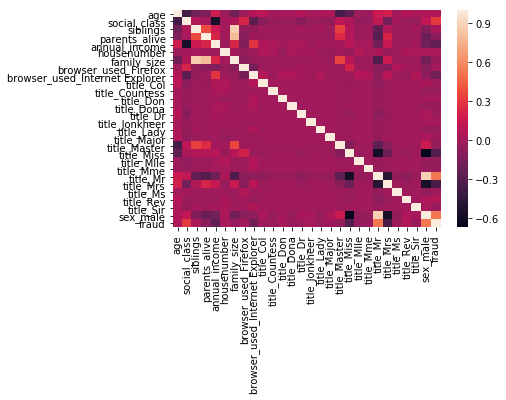